In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
import nltk
from nltk import pos_tag
import string
import re

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
import scipy
from sklearn.model_selection import train_test_split

In [3]:
books_df = pd.read_csv('book_df.csv', index_col= 0)
books_df.head()

,name,author,url,length,sample0,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9
0,Gunnison's Bonanza,Dick Purcell.,https://www.gutenberg.org/files/66752/66752-h/...,3706,of cunning and cruelty. Now he changed his min...,the hair off their own hides. But what did the...,it would have dangled him helpless and kicking...,"I get my money back?"" The pilot returned the g...","death, Gunnison could not help marveling. What...",from the path of a whizzing missile. The whist...,the hideous head. The result was amazing. The ...,"bitter, because even so extraordinary a situat...",Gunnison had certainly done his part. He was s...,fortune and the arena was all to his favor. He...
1,Life Of Schamyl,J. Milton Mackie.,https://www.gutenberg.org/files/22533/22533-h/...,52521,"hither he brought, as to a place of safety, ma...","Koran, is discountenanced by the Sufis and Sch...","in reaching the river unobserved, have swept l...",put Achwerdu-Mahomet to death. For alike despi...,vanguard pretended that they had seen here and...,"in the contest, and whose position on the Kois...","on hand a considerable quantity, such as maize...","gift of the grace of our lord the emperor, who...",encounter. [43] X. HUNTING. Schamyl's love for...,subject to him. His head-quarters he establish...
2,Further Experiences of an Irish R.M.,E. Å. Somerville and Martin Ross,https://www.gutenberg.org/files/38108/38108-h/...,66688,"ring the bell, I could then and there have bro...","without a change of expression, and turned to ...","by Mrs. Cadogan for sore throats, and divined ...",Master Eddy should proffer him the bone while ...,"spine, in her effort to fall again into stroke...","The voice, still more wrathfully, demanded the...",the decencies from thrashing him past the long...,by drunken people. I had assured Philippa (wit...,next incident in the affair occurred at about ...,"the chimney, and the tray was emptied into the..."
3,Feminism in Greek Literature,F. A. Wright.,https://www.gutenberg.org/files/59205/59205-h/...,51723,"her a minstrel, whom Agamemnon, when he went t...","believe: they are deceived by the adept, and m...",mixture in the six hundred lines of the Sixth ...,"merely is he, perhaps, the greatest mind that ...",you mean by that?â she cries. âI have been...,wife is in this speech accused by her stepson ...,"surest bond of union between us. At first, gen...","exists. To begin with, we must outbid each oth...",gentleman in matters of the affections that we...,head goes bald because the brain is there and ...
4,Three Years in the Federal Cavalry,Willard Glazier.,https://www.gutenberg.org/files/29660/29660-h/...,80560,"disabled, and at length our assailing ranks re...","in his eagerness for a fight, had advanced his...",Policy of the Rebellion.—Pennsylvania and the ...,quietness to the city; and about three miles b...,at the Pamunkey River. Here we captured a Rebe...,true soldier that suggests the experience and ...,"cavalry service, or any thing else, and a frie...","men were already on our way to ""Richmond!"" The...","its usual time."" It is evident that we are gre...","[Pg 274]""I saw that he had been properly infor..."


array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

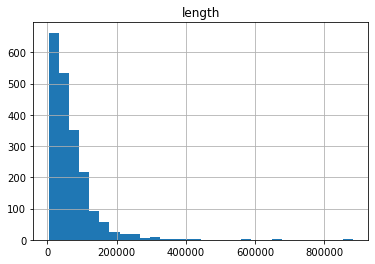

In [4]:
books_df.hist(bins=30)

<AxesSubplot:>

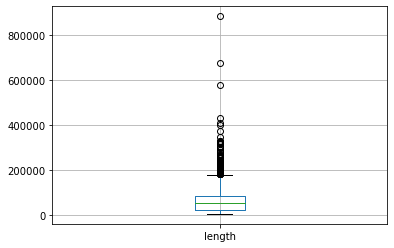

In [5]:
books_df.boxplot()

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

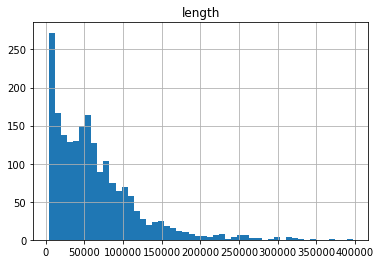

In [6]:
books_df[books_df['length'] < 400000].hist(bins=50)

<AxesSubplot:>

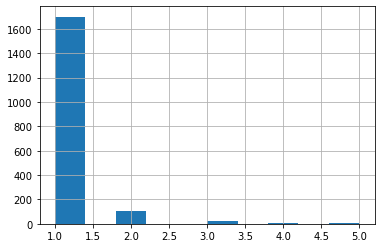

In [7]:
books_df['author'].value_counts().hist()

In [8]:
books_df.columns

Index(['name', 'author', 'url', 'length', 'sample0', 'sample1', 'sample2',
       'sample3', 'sample4', 'sample5', 'sample6', 'sample7', 'sample8',
       'sample9'],
      dtype='object')

In [9]:
l = pd.wide_to_long(books_df, stubnames='sample',i = ['name', 'author', 'length'], j= 'number')
l.reset_index(inplace= True)

In [10]:
l.head(10)

,name,author,length,number,url,sample
0,Gunnison's Bonanza,Dick Purcell.,3706,0,https://www.gutenberg.org/files/66752/66752-h/...,of cunning and cruelty. Now he changed his min...
1,Gunnison's Bonanza,Dick Purcell.,3706,1,https://www.gutenberg.org/files/66752/66752-h/...,the hair off their own hides. But what did the...
2,Gunnison's Bonanza,Dick Purcell.,3706,2,https://www.gutenberg.org/files/66752/66752-h/...,it would have dangled him helpless and kicking...
3,Gunnison's Bonanza,Dick Purcell.,3706,3,https://www.gutenberg.org/files/66752/66752-h/...,"I get my money back?"" The pilot returned the g..."
4,Gunnison's Bonanza,Dick Purcell.,3706,4,https://www.gutenberg.org/files/66752/66752-h/...,"death, Gunnison could not help marveling. What..."
5,Gunnison's Bonanza,Dick Purcell.,3706,5,https://www.gutenberg.org/files/66752/66752-h/...,from the path of a whizzing missile. The whist...
6,Gunnison's Bonanza,Dick Purcell.,3706,6,https://www.gutenberg.org/files/66752/66752-h/...,the hideous head. The result was amazing. The ...
7,Gunnison's Bonanza,Dick Purcell.,3706,7,https://www.gutenberg.org/files/66752/66752-h/...,"bitter, because even so extraordinary a situat..."
8,Gunnison's Bonanza,Dick Purcell.,3706,8,https://www.gutenberg.org/files/66752/66752-h/...,Gunnison had certainly done his part. He was s...
9,Gunnison's Bonanza,Dick Purcell.,3706,9,https://www.gutenberg.org/files/66752/66752-h/...,fortune and the arena was all to his favor. He...


In [11]:
print(sum(l.duplicated(subset = ['sample'])))
# print(sum(books_df.duplicated(subset = ['sample', 'rating'])))
# books_df.drop_duplicates(subset = ['sample', 'rating'], inplace=True)
print(sum(l.duplicated()))
# books_df.drop(['reviewer'], axis=1, inplace=True)

0
0


In [14]:
print(l[l.duplicated(subset = ['sample'], keep= False)== True])
l.drop_duplicates(subset= ['sample'], keep= False, inplace = True)

Empty DataFrame
Columns: [name, author, length, number, url, sample]
Index: []


In [15]:
l['tagged_sample'] = l['sample'].apply(lambda x : pos_tag(word_tokenize(x))) # Ad


In [16]:
l.head()

,name,author,length,number,url,sample,tagged_sample
0,Gunnison's Bonanza,Dick Purcell.,3706,0,https://www.gutenberg.org/files/66752/66752-h/...,of cunning and cruelty. Now he changed his min...,"[(of, IN), (cunning, VBG), (and, CC), (cruelty..."
1,Gunnison's Bonanza,Dick Purcell.,3706,1,https://www.gutenberg.org/files/66752/66752-h/...,the hair off their own hides. But what did the...,"[(the, DT), (hair, NN), (off, RP), (their, PRP..."
2,Gunnison's Bonanza,Dick Purcell.,3706,2,https://www.gutenberg.org/files/66752/66752-h/...,it would have dangled him helpless and kicking...,"[(it, PRP), (would, MD), (have, VB), (dangled,..."
3,Gunnison's Bonanza,Dick Purcell.,3706,3,https://www.gutenberg.org/files/66752/66752-h/...,"I get my money back?"" The pilot returned the g...","[(I, PRP), (get, VBP), (my, PRP$), (money, NN)..."
4,Gunnison's Bonanza,Dick Purcell.,3706,4,https://www.gutenberg.org/files/66752/66752-h/...,"death, Gunnison could not help marveling. What...","[(death, NN), (,, ,), (Gunnison, NNP), (could,..."


In [17]:
l['tags'] = l['tagged_sample'].apply(lambda x : ' '.join([i[1] for i in x]))
l.head()

,name,author,length,number,url,sample,tagged_sample,tags
0,Gunnison's Bonanza,Dick Purcell.,3706,0,https://www.gutenberg.org/files/66752/66752-h/...,of cunning and cruelty. Now he changed his min...,"[(of, IN), (cunning, VBG), (and, CC), (cruelty...",IN VBG CC NN . RB PRP VBD PRP$ NN . VBN IN DT ...
1,Gunnison's Bonanza,Dick Purcell.,3706,1,https://www.gutenberg.org/files/66752/66752-h/...,the hair off their own hides. But what did the...,"[(the, DT), (hair, NN), (off, RP), (their, PRP...",DT NN RP PRP$ JJ NNS . CC WP VBD PRP VB . NN C...
2,Gunnison's Bonanza,Dick Purcell.,3706,2,https://www.gutenberg.org/files/66752/66752-h/...,it would have dangled him helpless and kicking...,"[(it, PRP), (would, MD), (have, VB), (dangled,...",PRP MD VB VBN PRP JJ CC VBG IN NN . NNP IN JJ ...
3,Gunnison's Bonanza,Dick Purcell.,3706,3,https://www.gutenberg.org/files/66752/66752-h/...,"I get my money back?"" The pilot returned the g...","[(I, PRP), (get, VBP), (my, PRP$), (money, NN)...",PRP VBP PRP$ NN RB . '' DT NN VBD DT NN . `` P...
4,Gunnison's Bonanza,Dick Purcell.,3706,4,https://www.gutenberg.org/files/66752/66752-h/...,"death, Gunnison could not help marveling. What...","[(death, NN), (,, ,), (Gunnison, NNP), (could,...","NN , NNP MD RB VB VBG . WP NN IN JJ NNS VBD DT..."


In [18]:
def clean_text(text):
    # Clean text, remove end of lines, remove uppercase letters, puctuation and numbers.
    text = text.replace('\n','')
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    r=re.compile(r'\d')
    text = r.sub('', text)
    text = text.strip()
    return text
def stringit(x):
    # Convert list of words to string
    y = " "
    
    return y.join(x)
def normalize_text(df, col, add_on= ''):
    # Clean, Tokenize, and stem text. Remove stopwords from text. Returns a cleaned column, a tokenized column, and a column of tokens as string
    df['clean_txt' + add_on] = df[col].apply(lambda x : clean_text(x))
    df['tokenized_txt' + add_on] = df['clean_txt' + add_on].apply(lambda x : word_tokenize(x))
    stopword = stopwords.words('english') # Set stopwords
    df['tokenized_txt' + add_on] = df['tokenized_txt' + add_on].apply(lambda x : [word for word in x if word not in stopword]) # Remove stopwords for each row
    df['tokenized_string' + add_on] = df['tokenized_txt' + add_on].apply(lambda x : stringit(x))
    porter = nltk.stem.PorterStemmer() # Create stemmer
    df['stemmed_txt' + add_on] = df['tokenized_txt' +add_on].apply(lambda x : [porter.stem(word) for word in x])
    df['stemmed_string' + add_on] = df['stemmed_txt' + add_on].apply(lambda x : stringit(x))
    
normalize_text(l, 'sample') # Apply normilization

In [19]:
l.head()

,name,author,length,number,url,sample,tagged_sample,tags,clean_txt,tokenized_txt,tokenized_string,stemmed_txt,stemmed_string
0,Gunnison's Bonanza,Dick Purcell.,3706,0,https://www.gutenberg.org/files/66752/66752-h/...,of cunning and cruelty. Now he changed his min...,"[(of, IN), (cunning, VBG), (and, CC), (cruelty...",IN VBG CC NN . RB PRP VBD PRP$ NN . VBN IN DT ...,of cunning and cruelty now he changed his mind...,"[cunning, cruelty, changed, mind, coupled, emb...",cunning cruelty changed mind coupled embarrass...,"[cun, cruelti, chang, mind, coupl, embarrass, ...",cun cruelti chang mind coupl embarrass twist p...
1,Gunnison's Bonanza,Dick Purcell.,3706,1,https://www.gutenberg.org/files/66752/66752-h/...,the hair off their own hides. But what did the...,"[(the, DT), (hair, NN), (off, RP), (their, PRP...",DT NN RP PRP$ JJ NNS . CC WP VBD PRP VB . NN C...,the hair off their own hides but what did they...,"[hair, hides, nothing, old, bones, teeth, naus...",hair hides nothing old bones teeth nauseating ...,"[hair, hide, noth, old, bone, teeth, nauseat, ...",hair hide noth old bone teeth nauseat concoct ...
2,Gunnison's Bonanza,Dick Purcell.,3706,2,https://www.gutenberg.org/files/66752/66752-h/...,it would have dangled him helpless and kicking...,"[(it, PRP), (would, MD), (have, VB), (dangled,...",PRP MD VB VBN PRP JJ CC VBG IN NN . NNP IN JJ ...,it would have dangled him helpless and kicking...,"[would, dangled, helpless, kicking, space, set...",would dangled helpless kicking space set half ...,"[would, dangl, helpless, kick, space, set, hal...",would dangl helpless kick space set half power...
3,Gunnison's Bonanza,Dick Purcell.,3706,3,https://www.gutenberg.org/files/66752/66752-h/...,"I get my money back?"" The pilot returned the g...","[(I, PRP), (get, VBP), (my, PRP$), (money, NN)...",PRP VBP PRP$ NN RB . '' DT NN VBD DT NN . `` P...,i get my money back the pilot returned the gri...,"[get, money, back, pilot, returned, grin, im, ...",get money back pilot returned grin im afraid i...,"[get, money, back, pilot, return, grin, im, af...",get money back pilot return grin im afraid ive...
4,Gunnison's Bonanza,Dick Purcell.,3706,4,https://www.gutenberg.org/files/66752/66752-h/...,"death, Gunnison could not help marveling. What...","[(death, NN), (,, ,), (Gunnison, NNP), (could,...","NN , NNP MD RB VB VBG . WP NN IN JJ NNS VBD DT...",death gunnison could not help marveling what m...,"[death, gunnison, could, help, marveling, mann...",death gunnison could help marveling manner pit...,"[death, gunnison, could, help, marvel, manner,...",death gunnison could help marvel manner piti t...


In [20]:
l = l.dropna()
l.isna().sum()

name                0
author              0
length              0
number              0
url                 0
sample              0
tagged_sample       0
tags                0
clean_txt           0
tokenized_txt       0
tokenized_string    0
stemmed_txt         0
stemmed_string      0
dtype: int64

In [21]:
X = l['stemmed_string']
y = l['name']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.3, random_state=11)

<AxesSubplot:>

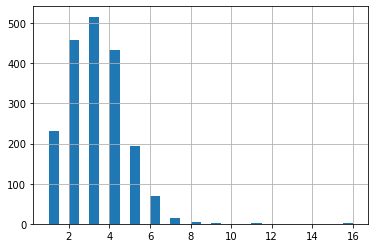

In [22]:
y_val.value_counts().hist(bins=30)

<AxesSubplot:>

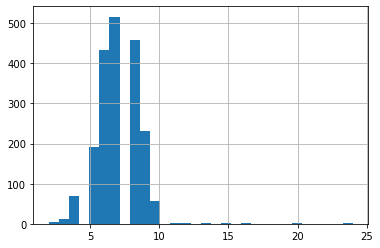

In [23]:
y_train.value_counts().hist(bins=30)

In [24]:
N_FEATURES = 5000 # Set number of features
N_CLASSES = len(l['name'].unique()) # Set number of classes

def build_network():
    # Compile a neural network
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape= (N_FEATURES,)))
    nn.add(Dense(150, activation= 'relu'))
    nn.add(Dense(N_CLASSES, activation= 'softmax'))
    nn.compile(
        loss= 'categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return nn

In [25]:
vectorizer = TfidfVectorizer( max_features= 5000) # Create vectorizer
tfidf_train = vectorizer.fit_transform(X_train) # Return features and tfidf values for training set
tfidf_train.sort_indices() # Sort by index (required by tensorflow)
tfidf_val = vectorizer.transform(X_val)  # Return tfidf values for test set
tfidf_val.sort_indices()

In [ ]:
train = {}
test = {}
for i in range(5, 50, 5):
    dnn =  KerasClassifier(build_fn= build_network,
                            epochs= i,
                            batch_size=128,
                          verbose=10)
    train_k = dnn.fit(tfidf_train, y_train) # Train model
    train[i] = train_k.history

    preds = dnn.predict(tfidf_val)
    accuracy = accuracy_score(y_val, preds) # Get accuracy of model
    test[i] = accuracy
# score_list = precision_recall_fscore_support(y_val, preds) # Get precision, recall, and f1 scores
print('Accuracy: ',accuracy)
# print('Precision:', score_list[0])
# print('Recall:   ', score_list[1])
# print('F1 score: ', score_list[2])
# mat = ConfusionMatrixDisplay(confusion_matrix(y_val, preds))
# mat.plot()

C:\Users\aarme\AppData\Local\Temp/ipykernel_33096/2714318305.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/5


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


C:\Users\aarme\AppData\Local\Temp/ipykernel_33096/2714318305.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/10


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


C:\Users\aarme\AppData\Local\Temp/ipykernel_33096/2714318305.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/15


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15


C:\Users\aarme\AppData\Local\Temp/ipykernel_33096/2714318305.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/20


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_9/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_9/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_9/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


C:\Users\aarme\AppData\Local\Temp/ipykernel_33096/2714318305.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/25


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25


C:\Users\aarme\AppData\Local\Temp/ipykernel_33096/2714318305.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/30


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_5/dense_15/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_5/dense_15/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_5/dense_15/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30


In [ ]:
test

In [ ]:
train

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train[45]['accuracy'], label= 'train')
plt.plot(test.keys(), test.values(), label= 'test')
plt.legend()
plt.title('Name Accuracy')


In [313]:
X = l['stemmed_string']
y2 = l['author']
X2_train, X2_val, y2_train, y2_val = train_test_split(X, y2, test_size =0.3, random_state=11)

N_FEATURES = 15000 # Set number of features
N_CLASSES = len(l['author'].unique()) # Set number of classes

def build_network():
    # Compile a neural network
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape= (N_FEATURES,)))
    nn.add(Dense(150, activation= 'relu'))
    nn.add(Dense(N_CLASSES, activation= 'softmax'))
    nn.compile(
        loss= 'categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return nn

vectorizer = TfidfVectorizer(ngram_range= (1,5), max_features= N_FEATURES) # Create vectorizer
tfidf_train = vectorizer.fit_transform(X2_train) # Return features and tfidf values for training set
tfidf_train.sort_indices() # Sort by index (required by tensorflow)
tfidf_val = vectorizer.transform(X2_val)  # Return tfidf values for test set
tfidf_val.sort_indices()

In [314]:
aut_train = {}
aut_test = {}
for i in range(5, 50, 5):
    dnn =  KerasClassifier(build_fn= build_network,
                            epochs= i,
                            batch_size=128,
                          verbose=10)
    train_k = dnn.fit(tfidf_train, y2_train) # Train model
    aut_train[i] = train_k.history
    preds = dnn.predict(tfidf_val)
    accuracy = accuracy_score(y2_val, preds) # Get accuracy of model
    aut_test[i] = accuracy
# score_list = precision_recall_fscore_support(y2_val, preds) # Get precision, recall, and f1 scores
# print('Accuracy: ',accuracy)
# print('Precision:', score_list[0])
# print('Recall:   ', score_list[1])
# print('F1 score: ', score_list[2])
# mat = ConfusionMatrixDisplay(confusion_matrix(y2_val, preds))
# mat.plot()

C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/5


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_104/dense_295/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_104/dense_295/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_104/dense_295/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/10


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_105/dense_298/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_105/dense_298/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_105/dense_298/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/15


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_106/dense_301/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_106/dense_301/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_106/dense_301/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/20


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_107/dense_304/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_107/dense_304/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_107/dense_304/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/25


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_108/dense_307/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_108/dense_307/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_108/dense_307/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/30


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_109/dense_310/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_109/dense_310/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_109/dense_310/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/35


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_110/dense_313/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_110/dense_313/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_110/dense_313/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/35
Epoch 3/35
Epoch 4/35
Epoch 5/35
Epoch 6/35
Epoch 7/35
Epoch 8/35
Epoch 9/35
Epoch 10/35
Epoch 11/35
Epoch 12/35
Epoch 13/35
Epoch 14/35
Epoch 15/35
Epoch 16/35
Epoch 17/35
Epoch 18/35
Epoch 19/35
Epoch 20/35
Epoch 21/35
Epoch 22/35
Epoch 23/35
Epoch 24/35
Epoch 25/35
Epoch 26/35
Epoch 27/35
Epoch 28/35
Epoch 29/35
Epoch 30/35
Epoch 31/35
Epoch 32/35
Epoch 33/35
Epoch 34/35
Epoch 35/35


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/40


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_111/dense_316/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_111/dense_316/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_111/dense_316/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/4203925436.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/45


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_112/dense_319/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_112/dense_319/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_112/dense_319/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/45
Epoch 3/45
Epoch 4/45
Epoch 5/45
Epoch 6/45
Epoch 7/45
Epoch 8/45
Epoch 9/45
Epoch 10/45
Epoch 11/45
Epoch 12/45
Epoch 13/45
Epoch 14/45
Epoch 15/45
Epoch 16/45
Epoch 17/45
Epoch 18/45
Epoch 19/45
Epoch 20/45
Epoch 21/45
Epoch 22/45
Epoch 23/45
Epoch 24/45
Epoch 25/45
Epoch 26/45
Epoch 27/45
Epoch 28/45
Epoch 29/45
Epoch 30/45
Epoch 31/45
Epoch 32/45
Epoch 33/45
Epoch 34/45
Epoch 35/45
Epoch 36/45
Epoch 37/45
Epoch 38/45
Epoch 39/45
Epoch 40/45
Epoch 41/45
Epoch 42/45
Epoch 43/45
Epoch 44/45
Epoch 45/45


In [315]:
aut_test

{5: 0.34367183591795897,
 10: 0.4203768550942138,
 15: 0.43271635817908954,
 20: 0.4382191095547774,
 25: 0.4432216108054027,
 30: 0.43638485909621477,
 35: 0.43638485909621477,
 40: 0.4373853593463398,
 45: 0.44772386193096547}

In [316]:
aut_train

{5: {'loss': [7.396191596984863,
   6.319626808166504,
   4.38673210144043,
   2.4749042987823486,
   1.1598618030548096],
  'accuracy': [0.007074966095387936,
   0.03423140197992325,
   0.21039091050624847,
   0.5295504927635193,
   0.8056885600090027]},
 10: {'loss': [7.374117851257324,
   6.218838214874268,
   4.267079830169678,
   2.4126524925231934,
   1.1671282052993774,
   0.48791608214378357,
   0.19329369068145752,
   0.08577363193035126,
   0.04410126060247421,
   0.02872326783835888],
  'accuracy': [0.006074465811252594,
   0.03637532889842987,
   0.22968627512454987,
   0.5404130816459656,
   0.7990424036979675,
   0.9446866512298584,
   0.9893518090248108,
   0.9981419444084167,
   0.9996426701545715,
   0.9998570680618286]},
 15: {'loss': [7.378219127655029,
   6.23476505279541,
   4.239920139312744,
   2.3461639881134033,
   1.0931285619735718,
   0.44145551323890686,
   0.1690889447927475,
   0.07455035299062729,
   0.04016231372952461,
   0.027245420962572098,
   0.020

Text(0.5, 1.0, 'Author Accuracy w/ N-grams')

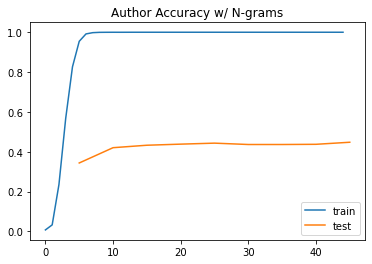

In [317]:
import matplotlib.pyplot as plt
plt.plot(aut_train[45]['accuracy'], label= 'train')
plt.plot(aut_test.keys(), aut_test.values(), label= 'test')
plt.legend()
plt.title('Author Accuracy w/ N-grams')


In [318]:
X = l['stemmed_string']
y = l['name']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.3, random_state=11)

N_FEATURES = 10000 # Set number of features
N_CLASSES = len(l['name'].unique()) # Set number of classes

def build_network():
    # Compile a neural network
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape= (N_FEATURES,)))
    nn.add(Dense(150, activation= 'relu'))
    nn.add(Dense(N_CLASSES, activation= 'softmax'))
    nn.compile(
        loss= 'categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return nn

vectorizer = TfidfVectorizer(ngram_range= (1,5), max_features= N_FEATURES) # Create vectorizer
tfidf_train = vectorizer.fit_transform(X_train) # Return features and tfidf values for training set
tfidf_train.sort_indices() # Sort by index (required by tensorflow)
tfidf_val = vectorizer.transform(X_val)  # Return tfidf values for test set
tfidf_val.sort_indices()

In [319]:
n_train = {}
n_test = {}
for i in range(5, 50, 5):
    dnn =  KerasClassifier(build_fn= build_network,
                            epochs= i,
                            batch_size=128,
                          verbose=10)
    train_k = dnn.fit(tfidf_train, y_train) # Train model
    n_train[i] = train_k.history
    preds = dnn.predict(tfidf_val)
    accuracy = accuracy_score(y_val, preds) # Get accuracy of model
    n_test[i] = accuracy

C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/5


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_113/dense_322/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_113/dense_322/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_113/dense_322/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/10


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_114/dense_325/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_114/dense_325/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_114/dense_325/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/15


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_115/dense_328/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_115/dense_328/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_115/dense_328/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/20


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_116/dense_331/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_116/dense_331/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_116/dense_331/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/25


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_117/dense_334/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_117/dense_334/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_117/dense_334/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/30


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_118/dense_337/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_118/dense_337/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_118/dense_337/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/35


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_119/dense_340/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_119/dense_340/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_119/dense_340/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/35
Epoch 3/35
Epoch 4/35
Epoch 5/35
Epoch 6/35
Epoch 7/35
Epoch 8/35
Epoch 9/35
Epoch 10/35
Epoch 11/35
Epoch 12/35
Epoch 13/35
Epoch 14/35
Epoch 15/35
Epoch 16/35
Epoch 17/35
Epoch 18/35
Epoch 19/35
Epoch 20/35
Epoch 21/35
Epoch 22/35
Epoch 23/35
Epoch 24/35
Epoch 25/35
Epoch 26/35
Epoch 27/35
Epoch 28/35
Epoch 29/35
Epoch 30/35
Epoch 31/35
Epoch 32/35
Epoch 33/35
Epoch 34/35
Epoch 35/35


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/40


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_120/dense_343/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_120/dense_343/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_120/dense_343/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3793485457.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/45


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_121/dense_346/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_121/dense_346/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_121/dense_346/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/45
Epoch 3/45
Epoch 4/45
Epoch 5/45
Epoch 6/45
Epoch 7/45
Epoch 8/45
Epoch 9/45
Epoch 10/45
Epoch 11/45
Epoch 12/45
Epoch 13/45
Epoch 14/45
Epoch 15/45
Epoch 16/45
Epoch 17/45
Epoch 18/45
Epoch 19/45
Epoch 20/45
Epoch 21/45
Epoch 22/45
Epoch 23/45
Epoch 24/45
Epoch 25/45
Epoch 26/45
Epoch 27/45
Epoch 28/45
Epoch 29/45
Epoch 30/45
Epoch 31/45
Epoch 32/45
Epoch 33/45
Epoch 34/45
Epoch 35/45
Epoch 36/45
Epoch 37/45
Epoch 38/45
Epoch 39/45
Epoch 40/45
Epoch 41/45
Epoch 42/45
Epoch 43/45
Epoch 44/45
Epoch 45/45


In [320]:
n_test

{5: 0.30748707687176924,
 10: 0.3871935967983992,
 15: 0.39803234950808736,
 20: 0.40286810071702517,
 25: 0.39919959979989994,
 30: 0.3988660997165249,
 35: 0.4020343505085876,
 40: 0.41870935467733866,
 45: 0.40970485242621313}

In [321]:
n_train

{5: {'loss': [7.477164268493652,
   6.312003135681152,
   4.510071277618408,
   2.8386940956115723,
   1.6147102117538452],
  'accuracy': [0.005216894205659628,
   0.030801115557551384,
   0.18923747539520264,
   0.4489387571811676,
   0.6873436570167542]},
 10: {'loss': [7.4731550216674805,
   6.260126113891602,
   4.37173318862915,
   2.7667603492736816,
   1.5994665622711182,
   0.852570116519928,
   0.4143575131893158,
   0.19208602607250214,
   0.09949550777673721,
   0.055082932114601135],
  'accuracy': [0.004073465242981911,
   0.03658972308039665,
   0.199385404586792,
   0.4511541426181793,
   0.6846994757652283,
   0.8524262309074402,
   0.9497606158256531,
   0.9863502979278564,
   0.995712161064148,
   0.9986422061920166]},
 15: {'loss': [7.488119125366211,
   6.277777671813965,
   4.330216407775879,
   2.6662752628326416,
   1.4911530017852783,
   0.7672055959701538,
   0.35710495710372925,
   0.16225647926330566,
   0.08174919337034225,
   0.04805615171790123,
   0.032291

Text(0.5, 1.0, 'Name Accuracy w/ N-grams')

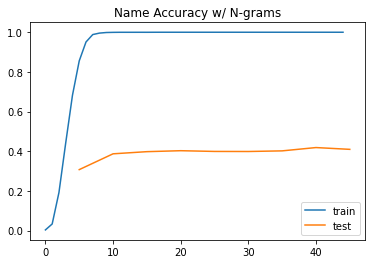

In [322]:
import matplotlib.pyplot as plt
plt.plot(n_train[45]['accuracy'], label= 'train')
plt.plot(n_test.keys(), n_test.values(), label= 'test')
plt.legend()
plt.title('Name Accuracy w/ N-grams')


Text(0, 0.5, 'accuracy')

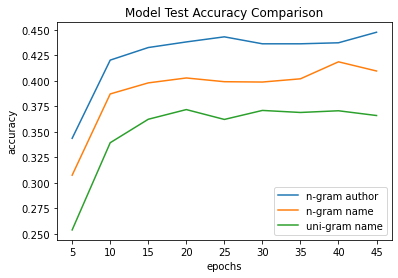

In [323]:
plt.plot(aut_test.keys(), aut_test.values(), label= 'n-gram author')
plt.plot(n_test.keys(), n_test.values(), label= 'n-gram name')
plt.plot(test.keys(), test.values(), label= 'uni-gram name')
plt.legend()
plt.title('Model Test Accuracy Comparison')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [324]:
train_k.history

{'loss': [7.465326309204102,
  6.246710300445557,
  4.451611042022705,
  2.8166344165802,
  1.6185868978500366,
  0.8570680022239685,
  0.4102685749530792,
  0.18991023302078247,
  0.09687037765979767,
  0.055359262973070145,
  0.03569895774126053,
  0.025656376034021378,
  0.019921932369470596,
  0.015862487256526947,
  0.01319036539644003,
  0.011135082691907883,
  0.009347931481897831,
  0.007939213886857033,
  0.006848274730145931,
  0.006017619278281927,
  0.00529462331905961,
  0.0046983687207102776,
  0.004194526467472315,
  0.003755350597202778,
  0.0033831337932497263,
  0.0030505897011607885,
  0.0027619802858680487,
  0.0025114775635302067,
  0.0022859610617160797,
  0.002085975371301174,
  0.0019075084710493684,
  0.0017456253990530968,
  0.0016043796204030514,
  0.0014729863032698631,
  0.0013561424566432834,
  0.0012498341966420412,
  0.001152223558165133,
  0.0010663947323337197,
  0.0009861630387604237,
  0.0009132646955549717,
  0.000844857597257942,
  0.00078459590440

In [325]:
x_val =tfidf_val.toarray()

In [326]:
X = l['stemmed_string']
y = l['author']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.3, random_state=11)

In [327]:
N_FEATURES = 15000 # Set number of features
N_CLASSES = len(l['author'].unique()) # Set number of classes

def build_network():
    # Compile a neural network
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape= (N_FEATURES,)))
    nn.add(Dense(150, activation= 'relu'))
    nn.add(Dense(N_CLASSES, activation= 'softmax'))
    nn.compile(
        loss= 'categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return nn

In [328]:
vectorizer = TfidfVectorizer(ngram_range= (1,5), max_features= 15000) # Create vectorizer
tfidf_train = vectorizer.fit_transform(X_train) # Return features and tfidf values for training set
tfidf_train.sort_indices() # Sort by index (required by tensorflow)
tfidf_val = vectorizer.transform(X_val)  # Return tfidf values for test set
tfidf_val.sort_indices()

In [329]:
dnn =  KerasClassifier(build_fn= build_network,
                        epochs= 100,
                        batch_size=128,
                      verbose=10)
train_k = dnn.fit(tfidf_train, y_train) # Train model

preds = dnn.predict(tfidf_val)
accuracy = accuracy_score(y_val, preds) # Get accuracy of model
score_list = precision_recall_fscore_support(y_val, preds) # Get precision, recall, and f1 scores
print('Accuracy: ',accuracy)
print('Precision:', score_list[0])
print('Recall:   ', score_list[1])
print('F1 score: ', score_list[2])

C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/1357904680.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/100


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_122/dense_349/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_122/dense_349/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_122/dense_349/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

C:\Users\aarme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> from sklearn.metrics import fbeta_score
C:\Users\aarme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  >>> from sklearn.metrics import fbeta_score


In [330]:
X = l['stemmed_string']
y = l['name']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.3, random_state=11)

N_FEATURES = 20000 # Set number of features
N_CLASSES = len(l['name'].unique()) # Set number of classes

def build_network():
    # Compile a neural network
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape= (N_FEATURES,)))
    nn.add(Dense(250, activation='relu'))
    nn.add(Dense(150, activation= 'relu'))
    nn.add(Dense(N_CLASSES, activation= 'softmax'))
    nn.compile(
        loss= 'categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return nn

vectorizer = TfidfVectorizer(ngram_range= (1,5), max_features= 20000) # Create vectorizer
tfidf_train = vectorizer.fit_transform(X_train) # Return features and tfidf values for training set
tfidf_train.sort_indices() # Sort by index (required by tensorflow)
tfidf_val = vectorizer.transform(X_val)  # Return tfidf values for test set
tfidf_val.sort_indices()

dnn =  KerasClassifier(build_fn= build_network,
                        epochs= 100,
                        batch_size=128,
                      verbose=10)
train_k = dnn.fit(tfidf_train, y_train) # Train model

preds = dnn.predict(tfidf_val)
accuracy = accuracy_score(y_val, preds) # Get accuracy of model
score_list = precision_recall_fscore_support(y_val, preds) # Get precision, recall, and f1 scores
print('Accuracy: ',accuracy)
print('Precision:', score_list[0])
print('Recall:   ', score_list[1])
print('F1 score: ', score_list[2])

C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/3994896152.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/100


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_123/dense_352/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_123/dense_352/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_123/dense_352/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

C:\Users\aarme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> from sklearn.metrics import fbeta_score
C:\Users\aarme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  >>> from sklearn.metrics import fbeta_score


In [331]:
X = l['tags']
y = l['name']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.3, random_state=11)

N_FEATURES = 15000 # Set number of features
N_CLASSES = len(l['name'].unique()) # Set number of classes

def build_network():
    # Compile a neural network
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape= (N_FEATURES,)))
    nn.add(Dense(150, activation= 'relu'))
    nn.add(Dense(N_CLASSES, activation= 'softmax'))
    nn.compile(
        loss= 'categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return nn

vectorizer = TfidfVectorizer(ngram_range= (3,8), max_features= N_FEATURES) # Create vectorizer
tfidf_train = vectorizer.fit_transform(X_train) # Return features and tfidf values for training set
tfidf_train.sort_indices() # Sort by index (required by tensorflow)

tfidf_val = vectorizer.transform(X_val)  # Return tfidf values for test set
tfidf_val.sort_indices()


In [332]:
dnn =  KerasClassifier(build_fn= build_network,
                        epochs= 50,
                        batch_size=128,
                      verbose=10)
train_k = dnn.fit(tfidf_train, y_train) # Train model

preds = dnn.predict(tfidf_val)
accuracy = accuracy_score(y_val, preds) # Get accuracy of model
score_list = precision_recall_fscore_support(y_val, preds) # Get precision, recall, and f1 scores
print('Accuracy: ',accuracy)
# print('Precision:', score_list[0])
# print('Recall:   ', score_list[1])
# print('F1 score: ', score_list[2])

C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/1481549808.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


Epoch 1/50


C:\Users\aarme\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_124/dense_356/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_124/dense_356/embedding_lookup_sparse/Reshape:0", shape=(None, 500), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_124/dense_356/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Accuracy:  0.15574453893613474


C:\Users\aarme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> from sklearn.metrics import fbeta_score
C:\Users\aarme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  >>> from sklearn.metrics import fbeta_score


In [333]:
from nltk import ngrams

In [ ]:
x = l['stemmed_string'].apply(lambda x : ngrams(x, 3))

In [101]:
from keras import models, layers
model = models.Sequential()
# model.add(layers.Conv1D(32, (3), activation= 'relu', input_shape=(N_FEATURES,)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3),activation= 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation= 'relu'))

# model.add(layers.Flatten())
model.add(layers.Input(shape= (N_FEATURES,)))
model.add(layers.Dense(500, activation= 'relu'))
model.add(layers.Dense(150, activation= 'softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 500)               5000500   
                                                                 
 dense_54 (Dense)            (None, 150)               75150     
                                                                 
Total params: 5,075,650
Trainable params: 5,075,650
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.compile(optimizer= 'rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
history = model.fit(tfidf_train, y_train, epochs= 20, batch_size= 128)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\aarme\anaconda3\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 150) are incompatible


In [118]:
clf = MLPClassifier(random_state=1, max_iter=3).fit(tfidf_train, y_train)

C:\Users\aarme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  if self.shuffle:


In [120]:
import numpy as np
np.array(tfidf_train)

array(<13998x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2288215 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [121]:
np.array(tfidf_val)

array(<6000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 974387 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [125]:
idx, idy, val = sparse.find(tfidf_val)

In [127]:
from scipy import sparse
import tensorflow as tf

In [128]:
full_indices = tf.stack([idx, idy], axis=1)

In [129]:
tfidf_val.shape

(6000, 10000)

In [140]:
sp_input = tf.SparseTensor(
  dense_shape=[6000, 10000],
  values=val,
  indices =tf.cast(full_indices, tf.int64))

In [147]:
tf.sparse.to_dense(tf.sparse.reorder(sp_input))


<tf.Tensor: shape=(6000, 10000), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [144]:
tfidf_val.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [146]:
np.array_equiv(tf.sparse.to_dense(tf.sparse.reorder(sp_input)).numpy(), tfidf_val.toarray())
   

True

In [ ]:
N_FEATURES = 5000 # Set number of features
N_CLASSES = len(l['name'].unique()) # Set number of classes

def build_network():
    # Compile a neural network
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape= (N_FEATURES,)))
    nn.add(Dense(150, activation= 'relu'))
    nn.add(Dense(N_CLASSES, activation= 'softmax'))
    nn.compile(
        loss= 'categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return nn

vectorizer = TfidfVectorizer( max_features= N_FEATURES) # Create vectorizer
tfidf_train = vectorizer.fit_transform(X_train) # Return features and tfidf values for training set
tfidf_train.sort_indices() # Sort by index (required by tensorflow)
tfidf_val = vectorizer.transform(X_val)  # Return tfidf values for test set
tfidf_val.sort_indices()

In [230]:
N_FEATURES = 5000 # Set number of features
N_CLASSES = len(l['name'].unique()) # Set number of classes

def build_network():
    # Compile a neural network
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape= (N_FEATURES,)))
    nn.add(Dense(150, activation= 'relu'))
    nn.add(Dense(N_CLASSES, activation= 'softmax'))
    nn.compile(
        loss= 'categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return nn

vectorizer = TfidfVectorizer( max_features= N_FEATURES) # Create vectorizer
tfidf_train = vectorizer.fit_transform(X_train) # Return features and tfidf values for training set
tfidf_train.sort_indices() # Sort by index (required by tensorflow)
tfidf_val = vectorizer.transform(X_val)  # Return tfidf values for test set
tfidf_val.sort_indices()

dnn =  KerasClassifier(build_fn= build_network,
                        epochs= 5,
                        batch_size=128,
                      verbose=10)


C:\Users\aarme\AppData\Local\Temp/ipykernel_2108/1582084651.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn =  KerasClassifier(build_fn= build_network,


ValueError: warm_start_from is not a legal parameter

In [ ]:
train_k = dnn.fit(tfidf_train, y_train) # Train model

# preds = dnn.predict(tfidf_val)
# accuracy = accuracy_score(y_val, preds)

In [221]:
train_k.history

{'loss': [7.483886241912842,
  6.147985935211182,
  4.288735389709473,
  2.8758764266967773,
  1.8949254751205444],
 'accuracy': [0.005357908084988594,
  0.04000571370124817,
  0.1994570642709732,
  0.41170167922973633,
  0.597942590713501]}

In [223]:
train_k.history

{'loss': [7.480738162994385,
  6.15192985534668,
  4.322259426116943,
  2.9353580474853516,
  1.954768419265747],
 'accuracy': [0.004929275717586279,
  0.03679097071290016,
  0.19688527286052704,
  0.4015573561191559,
  0.5866552591323853]}

In [233]:
for i in range(5, 100, 5):
    

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [266]:
len(l['author'].unique())

1836

In [267]:
len(l['name'].unique())

1985

In [13]:
len(l.iloc[1]['sample'].split())

400